#### Import Libraries:::

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
#Function to read the ubyte images file:
def read_ubyte_images(file_path):
    with open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')  
        num_images = int.from_bytes(f.read(4), 'big')   
        rows = int.from_bytes(f.read(4), 'big')        
        cols = int.from_bytes(f.read(4), 'big')        
        
        # Read image data (num_images * rows * cols)
        image_data = np.frombuffer(f.read(), dtype=np.uint8)
        images = image_data.reshape(num_images, rows, cols)
    return images

In [63]:
#Function to read the ubyte images label file:
def read_ubyte_labels(file_path):
    with open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')  
        num_labels = int.from_bytes(f.read(4), 'big')  
        
        # Read label data (num_labels)
        label_data = np.frombuffer(f.read(), dtype=np.uint8)
    
    return label_data

In [64]:
train_images = read_ubyte_images('./data/train-images.idx3-ubyte')
train_labels = read_ubyte_labels('./data/train-labels.idx1-ubyte')
test_images = read_ubyte_images('./data/t10k-images.idx3-ubyte')
test_labels = read_ubyte_labels('./data/t10k-labels.idx1-ubyte')

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


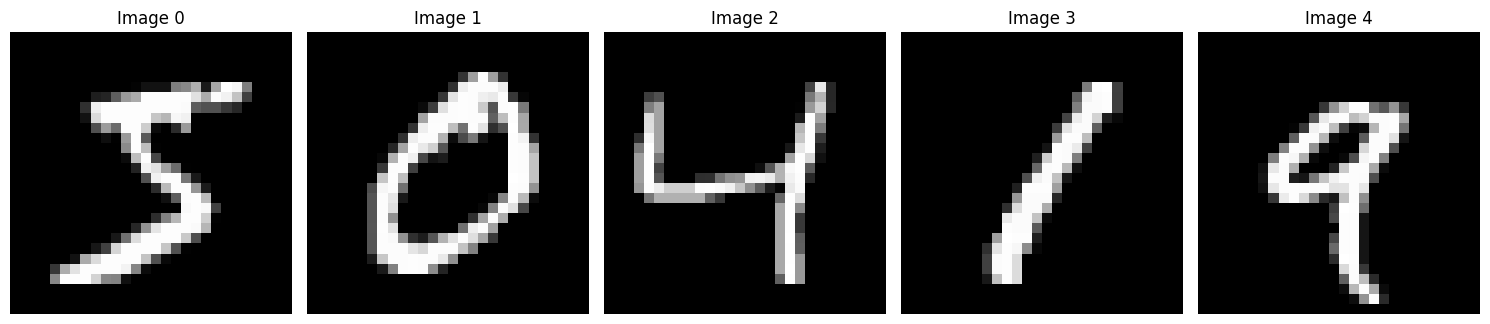

In [66]:
num_images = 5
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

# Plot each image in a row
for i in range(num_images):
    image = train_images[i]
    
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Image {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [70]:
df_labels = pd.Series(train_labels)
print(df_labels.head())

0    5
1    0
2    4
3    1
4    9
dtype: uint8
